In [81]:
import pandas as pd
import spacy, json
from sklearn import model_selection
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np


import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers, models

In [82]:
df = pd.read_json(open("data.json", "r", encoding="utf8"))

with open('themes.json', 'r') as f:
    theme_codes = json.load(f)

In [83]:
metrics = pd.read_csv('metrics.csv', index_col=0)

In [84]:
metrics.sort_values(by=['val_auc'], ascending=False).head(20)

,theme,accuracy,auc,val_accuracy,val_auc
92,spanish,0.997788,0.817742,0.999314,1.000000
91,veterans day,0.998551,0.502356,0.999314,0.989011
58,autumn,0.990314,0.699268,0.991764,0.900433
25,public domain,0.962401,0.782370,0.970487,0.894540
120,writing,0.997026,0.556531,0.996568,0.891804
11,winter,0.983298,0.841221,0.972546,0.884536
76,water,0.971934,0.907987,0.971860,0.882093
56,plants,0.958206,0.825269,0.960192,0.851465
23,animals,0.934182,0.830411,0.917639,0.844710
41,summer,0.984976,0.881418,0.978037,0.840515


In [85]:
texts_len = df['text'].apply(len)
df.drop(df[texts_len<50].index, inplace=True)

In [86]:
max_features = 10000  # maximum number of words in vocabulari 5000
max_len = 150  # max length of string

In [87]:
joined_text = df['title'] + df['text']
X = keras.preprocessing.sequence.pad_sequences(list(joined_text), maxlen=max_len, padding='post')

In [88]:
embedding_dim = 128
bin_mod = keras.models.Sequential([
  keras.layers.Embedding(input_dim=max_features,
                           output_dim=embedding_dim,
                           input_length=max_len),
  keras.layers.Flatten(),
  keras.layers.Dense(2000,activation='relu'),
  keras.layers.Dense(500,activation='relu'),
  keras.layers.Dense(100,activation='relu'),
  keras.layers.Dense(1, activation='sigmoid')
])

bin_mod.compile(optimizer='nadam',
              loss='binary_crossentropy',
              metrics=['binary_accuracy'])

bin_mod.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 150, 128)          1280000   
_________________________________________________________________
flatten_1 (Flatten)          (None, 19200)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 2000)              38402000  
_________________________________________________________________
dense_5 (Dense)              (None, 500)               1000500   
_________________________________________________________________
dense_6 (Dense)              (None, 100)               50100     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 101       
Total params: 40,732,701
Trainable params: 40,732,701
Non-trainable params: 0
__________________________________________

In [89]:
len(df['themes'][0])

93

In [90]:
df = df.reset_index(drop=True)

In [ ]:
frequencies = []
for i in range(93):
  t = 0 
  print(i, ' theme')
  for j in range(df.shape[0]):
    t += df['themes'][j][i]
  frequencies.append(t)
  print(t)

In [92]:
frequencies = np.array(frequencies)

In [93]:
frequencies[(-frequencies).argsort()[:15]]

array([2653, 2624, 2209, 2042, 1671, 1519, 1488, 1419, 1412, 1406, 1296,
       1140, 1122, 1098, 1097])

In [94]:
for i in (-frequencies).argsort()[:15]:
  for key, value in theme_codes.items():
    if value == i:
      print(key)

nature
free verse
family
arts & sciences
love
activities
death
audio & music
history & politics
body
heartache
animals
religion
related audio
life


In [95]:
metrics.loc[np.isin(metrics['theme'], ['nature', 'family', 'love', 'body', 'animals'])]

,theme,accuracy,auc,val_accuracy,val_auc
19,love,0.903066,0.845221,0.879204,0.784648
21,family,0.884228,0.839063,0.845573,0.764832
23,animals,0.934182,0.830411,0.917639,0.844710
49,nature,0.864780,0.826962,0.803706,0.763794
102,body,0.912980,0.860462,0.890185,0.709753


In [ ]:
['nature', 'family', 'love', 'body', 'animals']

In [96]:
themes_to_predict = ['nature', 'family', 'love', 'body', 'animals']

Theme #: nature
41/41 [==============================] - 2s 60ms/step - loss: 0.3975 - binary_accuracy: 0.8205
Test Score Model1: 0.3975192606449127
Test Accuracy Model1: 0.8204736709594727
Theme #: family
41/41 [==============================] - 2s 60ms/step - loss: 0.3881 - binary_accuracy: 0.8442
Test Score Model1: 0.3880941569805145
Test Accuracy Model1: 0.8441558480262756
Theme #: love
41/41 [==============================] - 2s 61ms/step - loss: 0.3314 - binary_accuracy: 0.8747
Test Score Model1: 0.3313919007778168
Test Accuracy Model1: 0.8747135400772095
Theme #: body
41/41 [==============================] - 3s 61ms/step - loss: 0.3209 - binary_accuracy: 0.8885
Test Score Model1: 0.3208989202976227
Test Accuracy Model1: 0.8884644508361816
Theme #: animals
41/41 [==============================] - 3s 81ms/step - loss: 0.2437 - binary_accuracy: 0.9282
Test Score Model1: 0.24370825290679932
Test Accuracy Model1: 0.9281894564628601
{'nature': 0.8204736709594727, 'family': 0.844155848

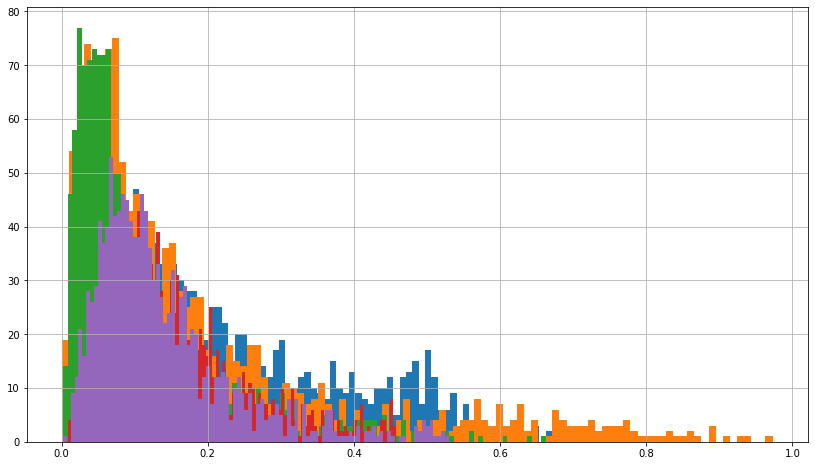

In [97]:
epochs = 1
result = {}
preds = {}
bin_models = {}

for theme in themes_to_predict:
    print('Theme #:', theme)
    theme_index = theme_codes[theme]
    Y = np.array([row['themes'][theme_index] for index, row in df.iterrows()])
    X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.1, random_state=42)
   
    bin_mod_ = models.clone_model(bin_mod)

    bin_mod_.compile(optimizer='nadam',
              loss='binary_crossentropy',
              metrics=['binary_accuracy'])

    bin_mod_.fit(np.array(X_train), np.array(Y_train),
          #batch_size=128,
          validation_data=(np.array(X_test),np.array(Y_test)),
          epochs=epochs)
    score = bin_mod_.evaluate(np.array(X_test), np.array(Y_test)) 
    print("Test Score Model1:", score[0])
    print("Test Accuracy Model1:", score[1])
    y_pred = bin_mod_.predict(X_test)
    bin_models['bin_model_' + theme] = bin_mod_
    #class_names = ['out of cat ', 'in cat']
    #cm = confusion_matrix(Y_test, np.rint(y_pred))
    #disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    #disp.plot()
    #plt.show()
    pd.Series(y_pred.flatten()).hist(bins=100, figsize=(14, 8)).figure
    preds[theme] = y_pred
    result[theme] = score[1]
print(result)

In [98]:
result2 = {}
preds2 = {}

for theme in themes_to_predict:
    print('Theme #:', theme)
    theme_index = theme_codes[theme]
    Y = np.array([row['themes'][theme_index] for index, row in df.iterrows()])
    X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.1, random_state=42)
    bin_mod = bin_models['bin_model_' + theme]
    #print(np.array(X_test))
    score = bin_mod.evaluate(np.array(X_test), np.array(Y_test)) 
    print("Test Score Model1:", score[0])
    print("Test Accuracy Model1:", score[1])
    y_pred = bin_mod.predict(X_test)

    preds2[theme] = y_pred
    result2[theme] = score[1]
print(result2)

Theme #: nature
41/41 [==============================] - 3s 62ms/step - loss: 0.3975 - binary_accuracy: 0.8205
Test Score Model1: 0.3975192606449127
Test Accuracy Model1: 0.8204736709594727
Theme #: family
41/41 [==============================] - 3s 62ms/step - loss: 0.3881 - binary_accuracy: 0.8442
Test Score Model1: 0.3880941569805145
Test Accuracy Model1: 0.8441558480262756
Theme #: love
41/41 [==============================] - 3s 62ms/step - loss: 0.3314 - binary_accuracy: 0.8747
Test Score Model1: 0.3313919007778168
Test Accuracy Model1: 0.8747135400772095
Theme #: body
41/41 [==============================] - 3s 62ms/step - loss: 0.3209 - binary_accuracy: 0.8885
Test Score Model1: 0.3208989202976227
Test Accuracy Model1: 0.8884644508361816
Theme #: animals
41/41 [==============================] - 3s 62ms/step - loss: 0.2437 - binary_accuracy: 0.9282
Test Score Model1: 0.24370825290679932
Test Accuracy Model1: 0.9281894564628601
{'nature': 0.8204736709594727, 'family': 0.844155848

In [ ]:
for theme in themes_to_predict:
  print(np.where(preds2[theme] >= 0.4))

In [106]:
preds2['nature'][[17,   23,   24,   28,   32,   37,   40,   45,   61,   62,   64]]

array([[0.5010266 ],
       [0.42018592],
       [0.47127149],
       [0.43191618],
       [0.4009911 ],
       [0.4746803 ],
       [0.64071685],
       [0.47019553],
       [0.45225242],
       [0.4421022 ],
       [0.4129531 ]], dtype=float32)

In [107]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, df['themes'], test_size=0.1, random_state=42)
for theme in themes_to_predict:
    print('Theme #:', theme)
    theme_index = theme_codes[theme]
    y_test = np.array([row[theme_index] for index, row in Y_test.items()])
    

    bin_mod = bin_models['bin_model_' + theme]
    #print(np.array(X_test))
    score = bin_mod.evaluate(np.array(X_test), 
                             np.array(y_test)) 
    print("Test Score Model1:", score[0])
    print("Test Accuracy Model1:", score[1])
    y_pred = bin_mod.predict(X_test)

Theme #: nature
41/41 [==============================] - 3s 65ms/step - loss: 0.3975 - binary_accuracy: 0.8205
Test Score Model1: 0.3975192606449127
Test Accuracy Model1: 0.8204736709594727
Theme #: family
41/41 [==============================] - 3s 64ms/step - loss: 0.3881 - binary_accuracy: 0.8442
Test Score Model1: 0.3880941569805145
Test Accuracy Model1: 0.8441558480262756
Theme #: love
41/41 [==============================] - 3s 66ms/step - loss: 0.3314 - binary_accuracy: 0.8747
Test Score Model1: 0.3313919007778168
Test Accuracy Model1: 0.8747135400772095
Theme #: body
41/41 [==============================] - 3s 62ms/step - loss: 0.3209 - binary_accuracy: 0.8885
Test Score Model1: 0.3208989202976227
Test Accuracy Model1: 0.8884644508361816
Theme #: animals
41/41 [==============================] - 2s 61ms/step - loss: 0.2437 - binary_accuracy: 0.9282
Test Score Model1: 0.24370825290679932
Test Accuracy Model1: 0.9281894564628601


In [108]:
bin_models

{'bin_model_animals': <tensorflow.python.keras.engine.sequential.Sequential at 0x7f1731280510>,
 'bin_model_body': <tensorflow.python.keras.engine.sequential.Sequential at 0x7f17341bd290>,
 'bin_model_family': <tensorflow.python.keras.engine.sequential.Sequential at 0x7f173dac2690>,
 'bin_model_love': <tensorflow.python.keras.engine.sequential.Sequential at 0x7f173bc3e410>,
 'bin_model_nature': <tensorflow.python.keras.engine.sequential.Sequential at 0x7f17471a6750>}

In [109]:
X_test[0]
print(y_test[15])

0


In [110]:
indices = np.where(y_test == 1)[0]

In [111]:
y_test[indices]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [ ]:
with np.printoptions(threshold=np.inf):
    print(y_test)

In [113]:
X_test[15]

array([ 143,  631,    1, 1601, 2404,  168,  166,   27,    1,  686, 9210,
        983,  143,  631,   64, 1558, 2012,   31,   69,  654,   84,  402,
         59, 2664, 1986,   58,    1, 3660, 1350,  631,  581,    1,  427,
       1242,   65,   21, 3136,  179, 1103, 1878,    1,  492, 4876,    2,
       2404, 1371,  111,   79,   11, 1103, 3701,  438,  378,  774,  214,
        102,    1,   31, 4927, 2404,  153,  146,  479,  123,  146,    1,
       1043,  767,  102, 2174,    1,   31, 1320,  266, 2906,  445,  581,
         72,   58,   69, 2113,    1,   31, 6460,  111,   44,  236, 3966,
        377, 2188,  131, 1074,  835, 2309,    1,   31,    1, 3213,   45,
        609,  295,    1,  158,  512, 4039,  255,    4,    1,   31, 6356,
          1,    9,   36,  174, 9963,   69,  122,  950,  332, 4537,    4,
          1,  600,  241,  626,  160,  146,  585,  878,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0], d

In [114]:
X_test.shape

(1309, 150)

In [115]:
X_test[15].shape

(150,)

In [116]:
np.reshape(X_test[15], (1, 150))

array([[ 143,  631,    1, 1601, 2404,  168,  166,   27,    1,  686, 9210,
         983,  143,  631,   64, 1558, 2012,   31,   69,  654,   84,  402,
          59, 2664, 1986,   58,    1, 3660, 1350,  631,  581,    1,  427,
        1242,   65,   21, 3136,  179, 1103, 1878,    1,  492, 4876,    2,
        2404, 1371,  111,   79,   11, 1103, 3701,  438,  378,  774,  214,
         102,    1,   31, 4927, 2404,  153,  146,  479,  123,  146,    1,
        1043,  767,  102, 2174,    1,   31, 1320,  266, 2906,  445,  581,
          72,   58,   69, 2113,    1,   31, 6460,  111,   44,  236, 3966,
         377, 2188,  131, 1074,  835, 2309,    1,   31,    1, 3213,   45,
         609,  295,    1,  158,  512, 4039,  255,    4,    1,   31, 6356,
           1,    9,   36,  174, 9963,   69,  122,  950,  332, 4537,    4,
           1,  600,  241,  626,  160,  146,  585,  878,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0, 

In [117]:
X_test[indices]

array([[6975,  901,  124, ...,    0,    0,    0],
       [ 104, 7961,   41, ...,    0,    0,    0],
       [  52,   11,  182, ...,    0,    0,    0],
       ...,
       [ 519,   37,    1, ...,    0,    0,    0],
       [  69,   60, 3403, ...,    0,    0,    0],
       [   2,  120,    1, ...,    0,    0,    0]], dtype=int32)

In [118]:
for name, model in bin_models.items():
  print(name)
  print(np.where(model.predict(X_test) >= 0.5))

bin_model_nature
(array([  17,   40,   91,  104,  107,  114,  122,  192,  223,  237,  238,
        239,  269,  270,  281,  284,  285,  294,  311,  316,  326,  345,
        395,  410,  420,  428,  468,  478,  499,  504,  509,  527,  535,
        543,  555,  560,  565,  569,  609,  627,  640,  662,  706,  729,
        730,  736,  745,  747,  792,  819,  837,  850,  862,  959,  966,
        970,  978,  993,  994, 1017, 1022, 1066, 1073, 1106, 1149, 1156,
       1158, 1167, 1228, 1246, 1247, 1251, 1255, 1271, 1272, 1281, 1294,
       1299, 1302, 1304, 1308]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))
bin_model_family
(array([  29,   33,   41,   44,   57,   69,   99,  106,  117,  121,  128,
        129,  133,  134,  135,  140,  147,  148,  178,  190,  212,  219,
 

In [123]:
df = pd.read_json(open("data.json", "r", encoding="utf8"))

with open('themes.json', 'r') as f:
    theme_codes = json.load(f)

In [124]:
texts_len = df['text'].apply(len)
df.drop(df[texts_len<50].index, inplace=True)

In [125]:
themes_to_predict = ['nature', 'family', 'love', 'body', 'animals']

In [126]:
max_features = 10000  # maximum number of words in vocabulari 5000
max_len = 150  # max length of string

In [127]:
joined_text = df['title'] + df['text']
X = keras.preprocessing.sequence.pad_sequences(list(joined_text), maxlen=max_len, padding='post')

In [128]:
embedding_dim = 64

mult_mod = keras.models.Sequential([
  keras.layers.Embedding(input_dim=max_features,
                           output_dim=embedding_dim,
                           input_length=max_len),
  keras.layers.Flatten(),
  keras.layers.Dense(2000, activation='relu'),
  keras.layers.Dropout(0.3),
  keras.layers.Dense(500, activation='relu'),
  keras.layers.Dropout(0.3),
  keras.layers.Dense(100, activation='relu'),
  keras.layers.Dense(5, activation='sigmoid')
])

mult_mod.compile(optimizer='nadam',
              loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])

mult_mod.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 150, 64)           640000    
_________________________________________________________________
flatten_4 (Flatten)          (None, 9600)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 2000)              19202000  
_________________________________________________________________
dropout_4 (Dropout)          (None, 2000)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 500)               1000500   
_________________________________________________________________
dropout_5 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 100)              

Create list with indices for themes to predict

In [136]:
theme_indices = []
for theme in themes_to_predict:
  print('Theme #:', theme)
  theme_index = theme_codes[theme]
  theme_indices.append(theme_index)

Theme #: nature
Theme #: family
Theme #: love
Theme #: body
Theme #: animals


In [143]:
Y = np.array([[row['themes'][theme_index] for theme_index in theme_indices] for index, row in df.iterrows()])
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.1, random_state=42)
epochs = 5
mult_mod.fit(np.array(X_train), np.array(Y_train),
          #batch_size=128,
          validation_data=(np.array(X_test),np.array(Y_test)),
          epochs=epochs)

Epoch 1/5
368/368 [==============================] - 130s 349ms/step - loss: 1683417.0000 - categorical_accuracy: 0.2676 - val_loss: 11983520.0000 - val_categorical_accuracy: 0.1482
Epoch 2/5
368/368 [==============================] - 128s 348ms/step - loss: 67817776.0000 - categorical_accuracy: 0.2514 - val_loss: 277027232.0000 - val_categorical_accuracy: 0.0176
Epoch 3/5
368/368 [==============================] - 128s 349ms/step - loss: 475247744.0000 - categorical_accuracy: 0.2491 - val_loss: 1227387264.0000 - val_categorical_accuracy: 0.1482
Epoch 4/5
368/368 [==============================] - 128s 348ms/step - loss: 1657308800.0000 - categorical_accuracy: 0.2576 - val_loss: 1903147264.0000 - val_categorical_accuracy: 0.1482
Epoch 5/5
368/368 [==============================] - 128s 348ms/step - loss: 4026296064.0000 - categorical_accuracy: 0.2487 - val_loss: 4908861440.0000 - val_categorical_accuracy: 0.1482


In [168]:
X_test[15]

array([ 143,  631,    1, 1601, 2404,  168,  166,   27,    1,  686, 9210,
        983,  143,  631,   64, 1558, 2012,   31,   69,  654,   84,  402,
         59, 2664, 1986,   58,    1, 3660, 1350,  631,  581,    1,  427,
       1242,   65,   21, 3136,  179, 1103, 1878,    1,  492, 4876,    2,
       2404, 1371,  111,   79,   11, 1103, 3701,  438,  378,  774,  214,
        102,    1,   31, 4927, 2404,  153,  146,  479,  123,  146,    1,
       1043,  767,  102, 2174,    1,   31, 1320,  266, 2906,  445,  581,
         72,   58,   69, 2113,    1,   31, 6460,  111,   44,  236, 3966,
        377, 2188,  131, 1074,  835, 2309,    1,   31,    1, 3213,   45,
        609,  295,    1,  158,  512, 4039,  255,    4,    1,   31, 6356,
          1,    9,   36,  174, 9963,   69,  122,  950,  332, 4537,    4,
          1,  600,  241,  626,  160,  146,  585,  878,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0], d

In [151]:
Y_test[13:15]

array([[0, 1, 0, 0, 0],
       [0, 1, 1, 0, 0]])

In [159]:
X_test.shape

(1309, 150)

In [160]:
X_test[15].shape

(150,)

This shows that model output only zeros

In [167]:
np.unique(mult_mod.predict(X_test))

array([0.], dtype=float32)